In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# Note - This notebook was made before speaking with Felix

In [3]:
data = pd.read_csv('raw_data/OptiFly_data.csv')


In [4]:
transfer_mask = data['Stops'] != 0
only_transfers =  data[transfer_mask]


In [5]:
data.shape, only_transfers.shape


((2497511, 42), (956005, 42))

# MULTI_CITY Dilemma
Trying to understand MULTI_CITY, as it leaves a lot of NaN values.

## Fields that become null are

### Confirmed in our dataset
DestinationAPT, DestinationCty, DestinationCtry, TravelDistanceKm

### Not in our dataset
ReturnDate, TripLengthNights, TravelType

## What detrmines MULTI_CITY?
The Kind column, which is not in our dataset

In [6]:
data


,OriginApt,OriginCty,OriginCtry,DestinationApt,DestinationCty,DestinationCtry,TravelHorizonDays,TravelDistanceKm,SelfTransfer,Stops,...,Seg_3_DestinationName,Seg_3_OperatingCarrierIATA,Seg_3_TravelDistanceKm,passengers,SearchLowestRatio,ItinLowestRatio,Price,PricePerPax,ItineraryRedirects,ODRedirects
0,TLV,TLV,IL,DLM,DLM,TR,61,767.0,False,0,...,NaN,NaN,NaN,6,1.747404,1.000789,350.720,175.356667,3,3
1,LIS,LIS,PT,GRU,SAO,BR,177,7935.0,False,0,...,NaN,NaN,NaN,1,1.000000,1.000000,465.965,465.965000,1,3
2,PNH,PNH,KH,SIN,SIN,SG,44,1136.0,False,0,...,NaN,NaN,NaN,3,1.034543,1.000000,86.700,86.700000,3,3
3,KSY,KSY,TR,SAW,IST,TR,4,1160.0,False,0,...,NaN,NaN,NaN,1,1.000000,1.000000,137.510,137.510000,1,3
4,LGW,LON,GB,BCN,BCN,ES,280,1109.0,False,0,...,NaN,NaN,NaN,4,1.000000,1.000000,465.095,116.275000,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497506,FOR,FOR,BR,GIG,RIO,BR,73,2176.0,False,0,...,NaN,NaN,NaN,1,1.000000,1.000000,80.410,80.410000,1,1
2497507,HEL,HEL,FI,IAD,WAS,US,5,6937.0,False,1,...,NaN,NaN,NaN,1,2.274954,1.000000,1230.750,1230.750000,1,1
2497508,ISG,ISG,JP,NGO,NGO,JP,33,1689.0,True,1,...,NaN,NaN,NaN,3,1.000000,1.000000,373.750,124.580000,1,1
2497509,JAI,JAI,IN,BLR,BLR,IN,27,1528.0,False,0,...,NaN,NaN,NaN,1,1.183133,1.000000,64.990,64.990000,1,1


In [7]:
data.columns


Index(['OriginApt', 'OriginCty', 'OriginCtry', 'DestinationApt',
       'DestinationCty', 'DestinationCtry', 'TravelHorizonDays',
       'TravelDistanceKm', 'SelfTransfer', 'Stops', 'DurationMin',
       'Seg_0_OriginIATA', 'Seg_0_OriginName', 'Seg_0_DestinationIATA',
       'Seg_0_DestinationName', 'Seg_0_OperatingCarrierIATA',
       'Seg_0_TravelDistanceKm', 'Seg_1_OriginIATA', 'Seg_1_OriginName',
       'Seg_1_DestinationIATA', 'Seg_1_DestinationName',
       'Seg_1_OperatingCarrierIATA', 'Seg_1_TravelDistanceKm',
       'Seg_2_OriginIATA', 'Seg_2_OriginName', 'Seg_2_DestinationIATA',
       'Seg_2_DestinationName', 'Seg_2_OperatingCarrierIATA',
       'Seg_2_TravelDistanceKm', 'Seg_3_OriginIATA', 'Seg_3_OriginName',
       'Seg_3_DestinationIATA', 'Seg_3_DestinationName',
       'Seg_3_OperatingCarrierIATA', 'Seg_3_TravelDistanceKm', 'passengers',
       'SearchLowestRatio', 'ItinLowestRatio', 'Price', 'PricePerPax',
       'ItineraryRedirects', 'ODRedirects'],
      dtype='object

In [8]:
destination_columns = ['OriginApt', 'OriginCty', 'OriginCtry', 'DestinationApt',
       'DestinationCty', 'DestinationCtry', 'Seg_0_OriginName', 'Seg_0_DestinationName',
        'Seg_1_DestinationName', 'Seg_2_DestinationName',
        'Seg_3_DestinationName']

data[destination_columns]


,OriginApt,OriginCty,OriginCtry,DestinationApt,DestinationCty,DestinationCtry,Seg_0_OriginName,Seg_0_DestinationName,Seg_1_DestinationName,Seg_2_DestinationName,Seg_3_DestinationName
0,TLV,TLV,IL,DLM,DLM,TR,Ben Gurion Intl,Dalaman,NaN,NaN,NaN
1,LIS,LIS,PT,GRU,SAO,BR,Lisbon,Sao Paulo Guarulhos,NaN,NaN,NaN
2,PNH,PNH,KH,SIN,SIN,SG,Phnom Penh,Singapore Changi,NaN,NaN,NaN
3,KSY,KSY,TR,SAW,IST,TR,Kars,Istanbul Sabiha,NaN,NaN,NaN
4,LGW,LON,GB,BCN,BCN,ES,London Gatwick,Barcelona,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2497506,FOR,FOR,BR,GIG,RIO,BR,Fortaleza,Rio De Janeiro Internacional,NaN,NaN,NaN
2497507,HEL,HEL,FI,IAD,WAS,US,Helsinki Vantaa,Frankfurt am Main,Washington Dulles,NaN,NaN
2497508,ISG,ISG,JP,NGO,NGO,JP,Ishigaki,Fukuoka,Nagoya Chubu Centrair,NaN,NaN
2497509,JAI,JAI,IN,BLR,BLR,IN,Jaipur,Bengaluru,NaN,NaN,NaN


In [9]:
only_transfers[['ODRedirects', 'ItineraryRedirects']]


,ODRedirects,ItineraryRedirects
5,3,1
7,3,2
10,3,3
20,3,2
25,3,1
...,...,...
2497504,1,1
2497505,1,1
2497507,1,1
2497508,1,1


In [10]:
data['Stops'].value_counts(normalize=True)


0    0.617217
1    0.323636
2    0.051785
3    0.007362
Name: Stops, dtype: float64

<Axes: >

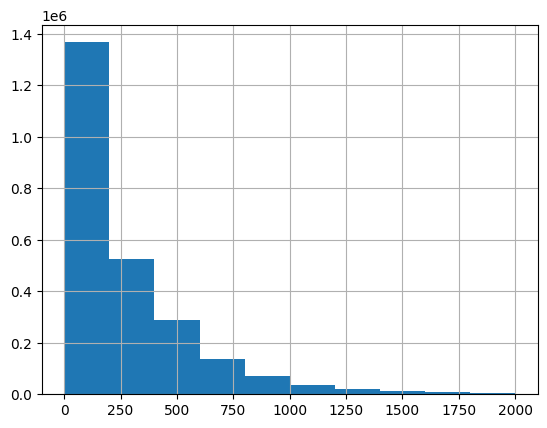

In [11]:

five_k_mask_for_all_data = data['PricePerPax'] < 2000
all_five_k_and_less_flights = data[five_k_mask_for_all_data]

all_five_k_and_less_flights['PricePerPax'].hist()


Text(0, 0.5, 'Number of flights')

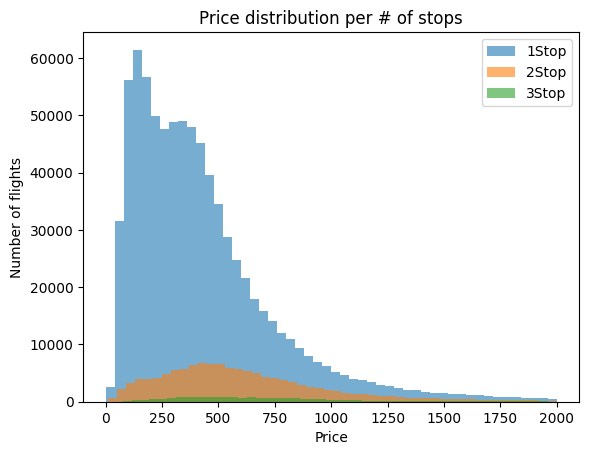

In [12]:
# plt.hist(all_five_k_and_less_flights[all_five_k_and_less_flights['Stops'] == 0]['PricePerPax'], label='0Stop', bins=50, alpha=0.6)
plt.hist(all_five_k_and_less_flights[all_five_k_and_less_flights['Stops'] == 1]['PricePerPax'], label='1Stop', bins=50, alpha=0.6)
plt.hist(all_five_k_and_less_flights[all_five_k_and_less_flights['Stops'] == 2]['PricePerPax'], label='2Stop', bins=50, alpha=0.6)
plt.hist(all_five_k_and_less_flights[all_five_k_and_less_flights['Stops'] == 3]['PricePerPax'], label='3Stop', bins=50, alpha=0.6)
plt.legend()
plt.title('Price distribution per # of stops')
plt.xlabel('Price')
plt.ylabel('Number of flights')


In [13]:
median_price_per_stops = all_five_k_and_less_flights[['PricePerPax', 'Stops']].groupby('Stops').median()


In [14]:
mean_price_per_stops = all_five_k_and_less_flights[['PricePerPax', 'Stops']].groupby('Stops').mean()


In [15]:
pd.concat((median_price_per_stops, mean_price_per_stops), axis=1, keys=['Median', 'Mean'])


,Median,Mean
,PricePerPax,PricePerPax
Stops,,
0,115.060,175.197152
1,355.480,428.283255
2,542.535,611.584636
3,631.170,702.805046


In [16]:
data[['TravelHorizonDays', 'PricePerPax']].corr()


,TravelHorizonDays,PricePerPax
TravelHorizonDays,1.000000,0.066063
PricePerPax,0.066063,1.000000


In [17]:
columns_in_question = ['TravelHorizonDays', 'DurationMin', 'PricePerPax']

filtered_data = data[columns_in_question]

filtered_data.corr()


,TravelHorizonDays,DurationMin,PricePerPax
TravelHorizonDays,1.000000,0.134878,0.066063
DurationMin,0.134878,1.000000,0.544466
PricePerPax,0.066063,0.544466,1.000000
